# Week 1 exercises

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
try:
    df = pd.read_csv("ETH_EUR.csv", index_col = 0)
    df2 = pd.read_csv("NASDAQOMX.csv", index_col = 0) 
except FileNotFoundError:
    import quandl
    df = quandl.get("GDAX/ETH_EUR", authtoken = "3CdfXCg8D_CWBs7UAwKr", index_col = 0)
    df2 = quandl.get("NASDAQOMX/OMXN40", authtoken= "3CdfXCg8D_CWBs7UAwKr", index_col = 0)
    df.to_csv("ETH_EUR", encoding = "utf-8")
    df2.to_csv("NASDAQOMX", encoding = "utf-8")


In [2]:
print(df.head())
print("====================================")
print(df2.head())

              Open    High     Low       Volume
Date                                           
30/05/2017  179.46  201.56  179.46   563.574044
31/05/2017  201.49  210.31  192.10  1823.492476
01/06/2017  205.00  211.20  180.00  4272.726510
02/06/2017  192.34  204.54  192.34  1890.842875
03/06/2017  197.00  201.22  196.52   604.755356
            Index Value  High  Low  Total Market Value  Dividend Market Value
Trade Date                                                                   
17/11/2008       638.85   0.0  0.0        2.258580e+11                    0.0
18/11/2008       636.30   0.0  0.0        2.249560e+11                    0.0
19/11/2008       609.51   0.0  0.0        2.154880e+11                    0.0
20/11/2008       591.20   0.0  0.0        2.090120e+11                    0.0
24/11/2008       621.92   0.0  0.0        2.198740e+11                    0.0


In [3]:
df2 = df2.rename(columns = {"Dividend Market Value":"Dividend",
                      "Total Market Value": "Total", "Index Value":"Index"})
df2

Index     High      Low         Total  Dividend
Trade Date                                                   
17/11/2008   638.85     0.00     0.00  2.258580e+11       0.0
18/11/2008   636.30     0.00     0.00  2.249560e+11       0.0
19/11/2008   609.51     0.00     0.00  2.154880e+11       0.0
20/11/2008   591.20     0.00     0.00  2.090120e+11       0.0
24/11/2008   621.92     0.00     0.00  2.198740e+11       0.0
...             ...      ...      ...           ...       ...
31/01/2020  1706.09  1726.58  1702.43  6.318630e+11       0.0
03/02/2020  1708.42  1713.39  1699.99  6.327260e+11       0.0
04/02/2020  1741.83  1741.83  1711.70  6.451010e+11       0.0
05/02/2020  1782.60  1786.96  1736.37  6.601980e+11       0.0
06/02/2020      NaN     0.00     0.00           NaN       0.0

[2869 rows x 5 columns]

In [4]:
def nDescriptive(df, year = 0):
    '''
    Making a function that prints some descriptive numbers
    for each column. 
    TODO: I still havent gotten it to work for each year, meaning I want
    to be able to select a specific year. 
    '''
    nList = list(df.columns.values)
    df["years"] = pd.DatetimeIndex(df.index).year

    if year > 0:
        for i in nList[:-1]:
            print("======================================================")
            print("Total per",year, "for ",i)
            print(f"The Mean: {df[i].loc[df.years == year].mean()}")
            print(f"The Median: {df[i].loc[df.years == year].median()}")
            print(f"The Std: {df[i].loc[df.years == year].std()}")
            print(f"The quantile: {df[i].loc[df.years == year].quantile([0.25,0.5,0.75])}")
    elif year == 0:
        print("Total for all years in the dataset.")
        for i in nList[:-1]:
            print("======================================================")
            print(i)
            print(f"The Mean: {df[i].mean()}")
            print(f"The Median: {df[i].median()}")
            print(f"The Std: {df[i].std()}")
            print(f"The quantile: {df[i].quantile([0.25,0.5,0.75])}")

nDescriptive(df, year = 2018)

Total per 2018 for  Open
The Mean: 466.0174131274131
The Median: 428.39
The Std: 232.03081617682867
The quantile: 0.25    309.025
0.50    428.390
0.75    619.805
Name: Open, dtype: float64
Total per 2018 for  High
The Mean: 484.6605405405405
The Median: 440.37
The Std: 245.40088150278177
The quantile: 0.25    319.985
0.50    440.370
0.75    647.450
Name: High, dtype: float64
Total per 2018 for  Low
The Mean: 441.4741312741313
The Median: 406.0
The Std: 215.82109833999172
The quantile: 0.25    298.24
0.50    406.00
0.75    585.10
Name: Low, dtype: float64


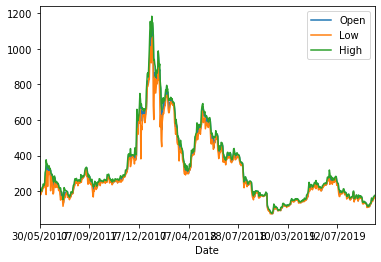

In [5]:
df[["Open", "Low", "High"]].plot()
plt.show()

In [6]:
def nVis(df, y, roll):
    if isinstance(roll, list):
        plt.figure(figsize = (16,5), dpi = 100)
        plt.plot(df.index, df[y], color = "tab:red", label = y)
        plt.gca().set(title = "Moving averages", xlabel = "Date", ylabel = y)
        for i in (roll):
            df[f"ma{i}"] = df[y].rolling(window = i, min_periods = 0).mean()
            plt.plot(df.index, df[f"ma{i}"], label = df[f"ma{i}"].name)
    else:
        df[f"ma{roll}"] = df[y].rolling(window = roll, min_periods = 0).mean()
        plt.figure(figsize = (16,5), dpi = 100)
        plt.plot(df.index, df[f"ma{roll}"], label = df[f"ma{roll}"].name)
        plt.plot(df.index, df[y], color = "tab:red", label = y)
        plt.gca().set(title = "Moving averages", xlabel = "Date", ylabel = y)
    plt.legend()
    plt.show()


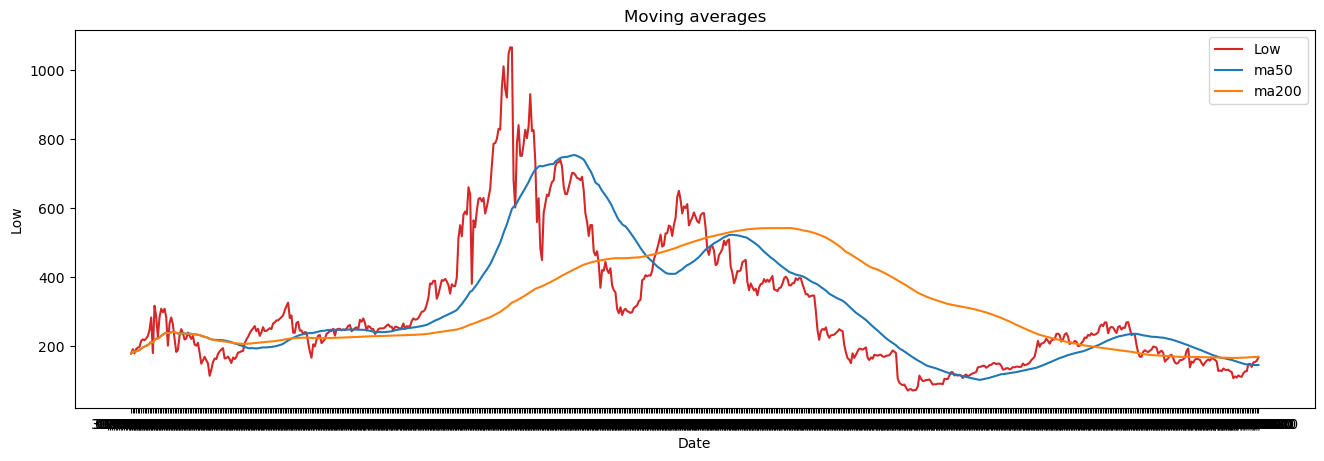

In [7]:
a = [50, 200]
nVis(df, "Low", roll = a)

In [8]:
def nLogReturns(df, x):
    '''
    This function takes a data frame and the column
    that is to be used to calculate log returns. 
    For this function I will not add a time seperator since
    it is not neccissary in this case.
    '''
    df[f"log{x}"] = np.log(df[x]) / np.log(df[x].shift(1))
    df[f"vol{x}"] = df[f"log{x}"].rolling(252).std() * np.sqrt(252)

In [9]:
df3 = df.join(df2, lsuffix = "_df", rsuffix = "_df2")

In [10]:
df4 = df3.dropna()

In [12]:
df4["Low_df"].corr(df4["Low_df2"])

0.0054102436369340276

In [15]:
df4.shape

(506, 12)